# Análise de dados com Python - Portal da Transparência

In [189]:
caminho_dados = 'dados/2024_Viagem.csv'

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## Lendo os dados

In [191]:
df_viagens = pd.read_csv(caminho_dados, sep=';', decimal=',', encoding='windows-1252')

KeyboardInterrupt: 

## Criando nova coluna de Despesas 

In [ ]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

## Ajustando valores nulos na coluna de cargo

In [ ]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Cargo não informado')

## Convertendo colunas de datas

In [ ]:
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format='%d/%m/%Y', errors='coerce')
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format='%d/%m/%Y', errors='coerce')

## Criando novas colunas de datas

In [ ]:
# Nome do mês da Viagem
df_viagens['Mês da Viagem'] = df_viagens['Período - Data de início'].dt.month_name()

# Dias de duração da viagem
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

## Criando tabela consolidada

In [ ]:
df_viagens_consolidada = (df_viagens
                          .groupby('Cargo')
                          .agg(
                              despesa_media=('Despesas', 'mean'),
                              duracao_media=('Dias de viagem', 'mean'),
                              despesas_totais=('Despesas', 'sum'),
                              destino_mais_frequente=('Destinos', pd.Series.mode),
                              n_viagens=('Nome', 'count')
                          )
                        .reset_index()
                        .sort_values(by='despesas_totais', ascending=False))

## Filtrando tabela consolidada por cargos relevantes (> 1% das Viagens)

In [ ]:
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidada['Cargo'].isin(cargos_relevantes)

## Chegando na tabela final - Consolidada e filtrada!

In [ ]:
df_final = df_viagens_consolidada[filtro].sort_values(by='n_viagens', ascending=False)

## Tabela Consolidada

In [ ]:
df_final

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
340,Cargo não informado,3574.12,7.64,1094734704.08,Brasília/DF,306295
467,Informações protegidas por sigilo,3433.61,7.44,406079749.80,Informações protegidas por sigilo,118266
598,PROFESSOR DO MAGISTERIO SUPERIOR,2229.97,3.95,115697383.00,Brasília/DF,51883
599,PROFESSOR ENS BASICO TECN TECNOLOGICO,1523.97,2.37,53136267.88,Brasília/DF,34867
335,CONTRATADO LEI 8745/93 - NI,847.17,2.26,14570511.56,Fortaleza/CE,17199
229,AUDITOR FISCAL FEDERAL AGROPECUARIO,1549.41,2.07,25088021.78,Brasília/DF,16192
91,ANALISTA AMBIENTAL,2821.74,5.20,36592385.67,Brasília/DF,12968
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2935.65,3.14,32873453.29,Brasília/DF,11198
199,ASSISTENTE EM ADMINISTRAçãO,1518.00,2.31,15948157.02,Brasília/DF,10506
133,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,2053.62,3.42,20595751.66,Brasília/DF,10029


## Criando a figura

<Axes: title={'center': 'Número de Viagens por Cargo'}, xlabel='Cargo'>

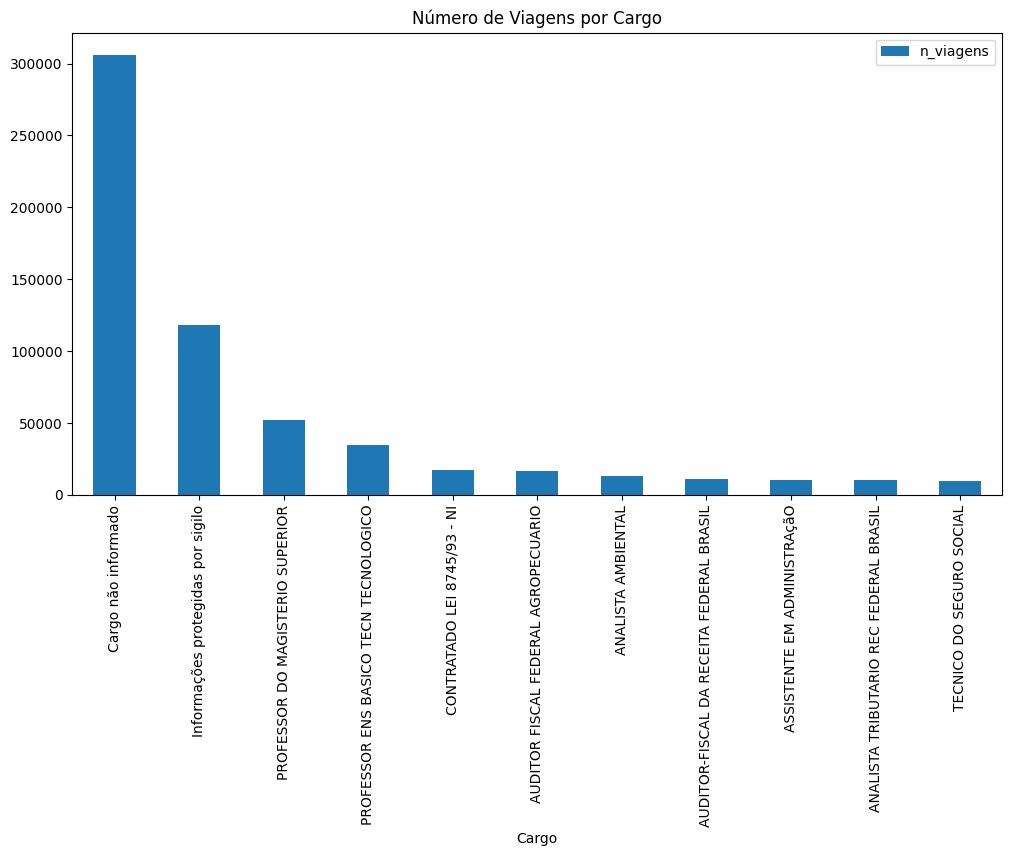

In [ ]:
df_final.plot(x="Cargo", y="n_viagens", kind="bar", figsize=(12, 6), title="Número de Viagens por Cargo")

### Realção entre Cargo e Despesas Totais

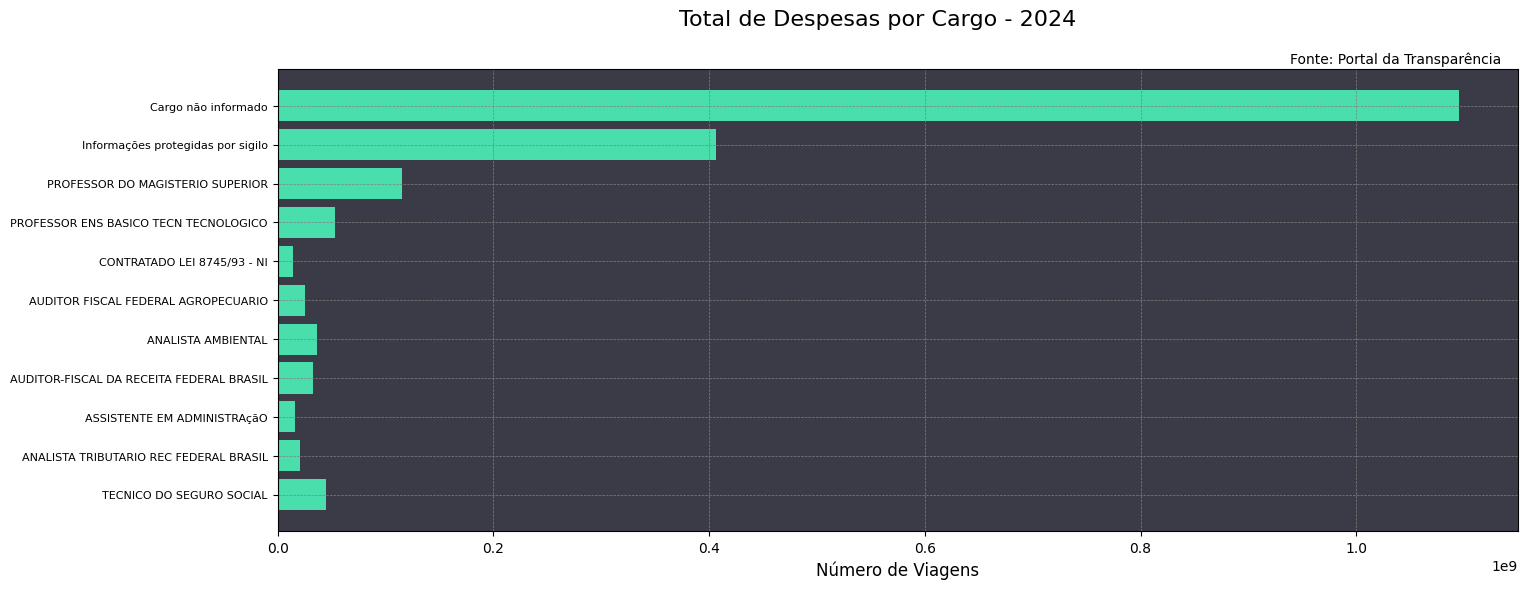

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_final['Cargo'], df_final['despesas_totais'], color='#49deac')
ax.invert_yaxis()
ax.set_facecolor('#3b3b47')

fig.suptitle('Total de Despesas por Cargo - 2024', fontsize=16)
plt.figtext(0.89, 0.89, 'Fonte: Portal da Transparência', fontsize=10, ha='right')

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)

plt.xlabel('Número de Viagens', fontsize=12)

plt.show()

### Relação entre dias de viagem e despesas 

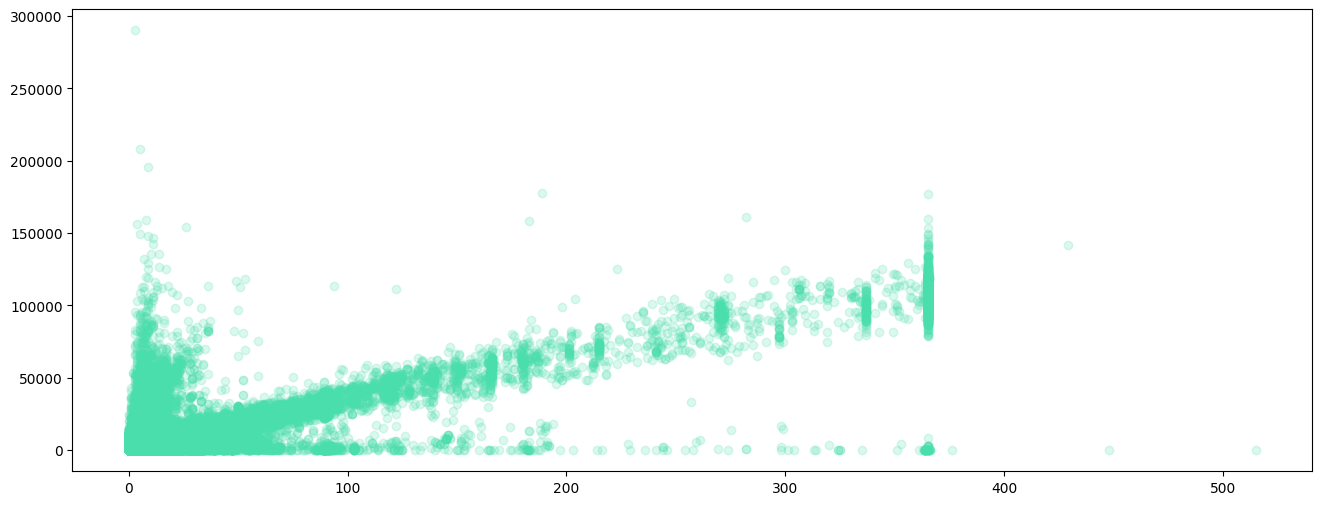

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(df_viagens['Dias de viagem'], df_viagens['Despesas'], color='#49deac', alpha=0.2)


### Exploração das Despesas acima de R$175000

In [ ]:
(df_viagens['Despesas'] > 175_000).value_counts()


filtro = df_viagens['Despesas'] > 175_000 
df_viagens[filtro]


,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da Viagem,Dias de viagem
9918,19668216,000844/24-17C,Realizada,SIM,"Face o DECRETO Nº 11.348, DE 1º DE JANEIRO DE ...",-1,Sem informação,-1,Sem informação,***.468.361-**,BRUNO REZENDE CABRAL,Cargo não informado,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Rio de Janeiro/RJ, Angra dos Reis...",Em continuidade a PCDP 051838/23 - Centro de C...,118425.85,58502.93,0.00,0.00,176928.78,January,365
241056,19961140,010529/24-1C,Realizada,SIM,Conforme Nota Técnica em anexo.,22000,Ministério da Agricultura e Pecuária,22000,Ministério da Agricultura e Pecuária - Unidade...,***.693.051-**,IRAJA REZENDE DE LACERDA,Cargo não informado,CCX-0118,CCX-0118,2024-05-24,2024-06-02,"Xangai/China, Shenzhen/China",Participar de reuniões e encontro governamenta...,14281.65,180718.90,0.00,860.85,195861.40,May,9
263786,19989596,014282/24,Não realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.639.875-**,OLGA MARIA SILVA EMBIRUCU,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,-1,Sem informação,2024-06-12,2024-06-15,Rio de Janeiro/RJ,Foco na identificação das soluções tecnológica...,0.00,290096.16,0.00,0.00,290096.16,June,3
331014,20073775,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006400272,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-07-07,2025-01-12,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,153371.34,12503.74,0.00,11755.96,177631.04,July,189
359586,20109417,001426/24-2C,Realizada,SIM,Ajuste de dados.,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.050.944-**,CELSO LUIZ NUNES AMORIM,Cargo não informado,CCX-0118,CCX-0118,2024-07-16,2024-07-21,Washington/Estados Unidos da América,Encontro com autoridades dos Estados Unidos da...,7675.59,199689.55,0.00,532.33,207897.47,July,5


## Relação Passagens x Viagem

In [ ]:
caminho_dados_passagem = 'dados/2024_Passagem.csv'
df_passagens = pd.read_csv(caminho_dados_passagem, sep=';', decimal=',', encoding='windows-1252')
df_passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,19177818,000001/24-1C,Aéreo,Brasil,Distrito Federal,Brasília,França,NaN,Paris,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6871.34,6.60,19/09/2023,18:53
1,19177818,000001/24-1C,Aéreo,França,NaN,Paris,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7.77,6.60,19/09/2023,18:53
2,19220977,000001/24-1C,Aéreo,Brasil,Paraná,Curitiba,Portugal,NaN,Porto,Portugal,NaN,Porto,Brasil,Paraná,Curitiba,8596.69,0.00,31/08/2023,14:49
3,19255612,000002/24,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:40
4,19255728,000001/24,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399101,2024001938,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,0.00,0.00,NaN,00:00
399102,2024001946,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Rio Grande do Sul,Santo Ângelo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2032.42,0.00,NaN,00:00
399103,2024001946,Sem informaçã,Aéreo,Brasil,Rio Grande do Sul,Passo Fundo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3530.40,0.00,NaN,00:00
399104,2024001948,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2044.85,0.00,NaN,00:00


### Relação Passagens x Viagem (Pelo indentificador de processo de viagem nº 19989596)

In [ ]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 19989596]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
153092,19989596,014282/24,Aéreo,Brasil,São Paulo,Campinas,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,288949.19,0.00,20/05/2024,14:46
153093,19989596,014282/24,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Bahia,Salvador,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1146.97,0.00,20/05/2024,14:47


## Fazendo Joins entre planilhas


In [192]:
df_viagens.merge(df_passagens)

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da Viagem,Dias de viagem,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,21068.69,January,8,Aéreo,Brasil,Distrito Federal,Brasília,França,NaN,Paris,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6871.34,6.60,19/09/2023,18:53
1,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,21068.69,January,8,Aéreo,França,NaN,Paris,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7.77,6.60,19/09/2023,18:53
2,19220977,000001/24-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26258,Universidade Tecnológica Federal do Paraná,***.133.960-**,PAULO CICERO FRITZEN,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-01-16,2024-07-28,Porto/Portugal,Devido minha seleção para participar como inve...,0.00,8596.69,0.00,9635.54,18232.23,January,194,Aéreo,Brasil,Paraná,Curitiba,Portugal,NaN,Porto,Portugal,NaN,Porto,Brasil,Paraná,Curitiba,8596.69,0.00,31/08/2023,14:49
3,19255612,000002/24,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52121,Comando do Exército,***.480.087-**,DAVI DEMOCRIS,Cargo não informado,OfSubalter,OfSubalter,2024-01-01,2024-01-03,"Munique/Alemanha, Rio de Janeiro/RJ",Movimentação de militar por término de missão ...,0.00,4625.13,0.00,1283.76,5908.89,January,2,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:40
4,19255728,000001/24,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52121,Comando do Exército,NaN,RENATA RAMOS JUSTINIANO,Cargo não informado,-1,Sem informação,2024-01-01,2024-01-03,"Munique/Alemanha, Rio de Janeiro/RJ","DEPENDENTE (Esposa) do Cap Com DAVI DEMOCRIS, ...",0.00,4625.13,0.00,0.00,4625.13,January,2,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399105,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.00,0.00,0.00,December,1,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,0.00,0.00,NaN,00:00
399106,2024001

## Criando caminho de Saída